#Import Modules

In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#Import Estimators

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#Model Metrics

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#Cross Validation

In [4]:
from sklearn.model_selection import train_test_split

#Feature Selection

In [5]:
from sklearn.feature_selection import RFECV

#Import Dataset

In [6]:
CreditPrep = pd.read_csv('CreditPrep.csv')

In [7]:
CreditPrep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 89 columns):
LIMIT_BAL          30000 non-null int64
AGE                30000 non-null int64
BILL_AMT1          30000 non-null int64
BILL_AMT2          30000 non-null int64
BILL_AMT3          30000 non-null int64
BILL_AMT4          30000 non-null int64
BILL_AMT5          30000 non-null int64
BILL_AMT6          30000 non-null int64
PAY_AMT1           30000 non-null int64
PAY_AMT2           30000 non-null int64
PAY_AMT3           30000 non-null int64
PAY_AMT4           30000 non-null int64
PAY_AMT5           30000 non-null int64
PAY_AMT6           30000 non-null int64
DEFAULT            30000 non-null int64
Female             30000 non-null int64
Male               30000 non-null int64
Graduate School    30000 non-null int64
High School        30000 non-null int64
Other              30000 non-null int64
University         30000 non-null int64
Divorce            30000 non-null int64
Married    

In [8]:
CreditPrep.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,April-1,April-2,April0,April2,April3,April4,April5,April6,April7,April8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,1,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


#Isolate Dependent Variable from Predictors

In [9]:
DepVar = CreditPrep['DEFAULT']

In [10]:
DepVar.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [11]:
Features = CreditPrep.drop(['DEFAULT'], axis='columns')

In [12]:
Features.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,April-1,April-2,April0,April2,April3,April4,April5,April6,April7,April8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,1,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


#Establish Train and Test Set

In [13]:
#Training Set (Feature Space: X Training)
Features_train = (Features[: 21000])
Features_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,April-1,April-2,April0,April2,April3,April4,April5,April6,April7,April8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,1,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0


In [14]:
#Dependent Variable Training Set (y Training)
DepVar_train = DepVar[:21000 ]
DepVar_train_count = len(DepVar_train.index)
print('The # of Obs. in DepVar training set are:', str(DepVar_train_count))
DepVar_train.head()

The # of Obs. in DepVar training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [15]:
#Testing Set (X Testing)
Features_test = Features[-9000:]
Features_test_count = len(Features_test.index)
print('The # of Obs. in Features test set are:', str(Features_test_count))
Features_test.head()

The # of Obs. in Features test set are: 9000


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,April-1,April-2,April0,April2,April3,April4,April5,April6,April7,April8
21000,30000,36,0,780,0,1170,780,0,780,0,...,0,0,1,0,0,0,0,0,0,0
21001,280000,40,178220,184848,188411,191291,189029,192023,10000,9000,...,0,0,1,0,0,0,0,0,0,0
21002,260000,37,128602,118109,21557,23186,14117,15797,3203,6015,...,0,0,1,0,0,0,0,0,0,0
21003,200000,32,160106,162743,81890,0,0,0,7600,4000,...,0,1,0,0,0,0,0,0,0,0
21004,80000,32,79237,65301,67253,67352,74448,72928,3000,4005,...,0,0,0,1,0,0,0,0,0,0


#Ground Truth

In [16]:
#Ground Truth (y_test) 
DepVar_test = DepVar[-9000:]
DepVar_test_count = len(DepVar_test.index)
print('The # of Obs in the DepVar test set are:',str(DepVar_test_count))
DepVar_test.head()

The # of Obs in the DepVar test set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: DEFAULT, dtype: int64

#Cross Validation

In [17]:
Features_train, Features_test, DepVar_train, DepVar_test = train_test_split(Features_train, DepVar_train)

#Shape Function to Confirm Split

In [18]:
DepVar_train.shape, Features_test.shape

((15750,), (5250, 88))

#Random Forest Model OTB

In [19]:
np.random.seed(111)
modelRF = RandomForestClassifier ()

In [20]:
#Model Fitting
modelRF.fit(Features_train,DepVar_train)

c:\users\launa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Cross Validation

In [21]:
RFAcc = cross_val_score(modelRF, Features_train, DepVar_train, cv=10, scoring = 'accuracy').mean()
RFAcc

0.7994919745231537

    #R-Squared

In [22]:
modelRF.score(Features_train,DepVar_train)

0.9798730158730159

#Random Forest Tunning  

In [23]:
np.random.seed(222)
modelRF20 = RandomForestClassifier (n_estimators = 20, class_weight = 'balanced')
modelRF20.fit(Features_train,DepVar_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

#Cross Validation

In [24]:
RF20Acc = cross_val_score(modelRF20, Features_train, DepVar_train, cv = 10, scoring ='accuracy').mean() 
RF20Acc

0.8029190955742115

#R-Squared

In [25]:
modelRF20.score(Features_train,DepVar_train)

0.9925714285714285

In [26]:
np.random.seed(333)
modelRF30 = RandomForestClassifier (n_estimators = 30)
modelRF30.fit(Features_train,DepVar_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
RF30Acc = cross_val_score(modelRF30, Features_train, DepVar_train, cv = 10, scoring ='accuracy').mean() 
RF30Acc

0.8045043820003507

In [28]:
np.random.seed(444)
modelRF40 = RandomForestClassifier (n_estimators = 40)
modelRF40.fit(Features_train,DepVar_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
RF40Acc = cross_val_score(modelRF40, Features_train, DepVar_train, cv = 10, scoring ='accuracy').mean() 
RF40Acc

0.807807622854137

#Recursive Feature Selection

In [30]:
rfOptModel = RFECV (RandomForestClassifier(), scoring = 'accuracy')

In [31]:
rfOptModel.fit

<bound method RFECV.fit of RFECV(cv='warn',
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)>

RFOptAcc = cross_val_score(rfOptModel, Features_train, DepVar_train, cv = 10, scoring ='accuracy').mean() 
RFOptAcc

#K Nearest Neighbor Model OTB

In [32]:
np.random.seed(333)
modelKNN = KNeighborsClassifier()

#Model Fitting

In [33]:
modelKNN.fit (Features_train,DepVar_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#Cross Validation

In [34]:
KNNAcc = cross_val_score(modelKNN, Features_train, DepVar_train, cv = 10, scoring ='accuracy').mean() 
KNNAcc

0.7362524126289985

#R-Squared

In [35]:
modelKNN.score(Features_train,DepVar_train)

0.8097777777777778

#K Nearest Neighbor Model Tunning

In [36]:
np.random.seed(444)
modelKNN5 = KNeighborsClassifier(n_neighbors = 5, n_jobs = 10)

#Model Fitting

In [37]:
modelKNN5.fit (Features_train,DepVar_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=10, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
KNN5Acc = cross_val_score(modelKNN5, Features_train, DepVar_train, cv = 10, scoring ='accuracy').mean() 
KNN5Acc

0.7362524126289985

#Determine Optimal K Value

In [39]:
k_range = range (1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Features_train, DepVar_train, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.6831114375522718, 0.7492056435467287, 0.7225393729913528, 0.7554907547071873, 0.7362524126289985, 0.7599990954144974, 0.746983702718118, 0.7614587684900993, 0.7532690157735017, 0.7644434201246036, 0.7585391002489185, 0.764697872383774, 0.7605709275198242, 0.7657135844058489, 0.7620942938371777, 0.7658400041587079, 0.7648878242310152, 0.7667920625603982, 0.7645066297706762, 0.7676179836266492, 0.7666654816089797, 0.7697128190070353, 0.7675546528640976, 0.7692060112473492, 0.7676822819900819, 0.7697773190606317, 0.7688252604541795, 0.7689523653905003, 0.7690790270691747, 0.7704758530290945]


#Plot Optimal K Value

Text(0, 0.5, 'Accuracy')

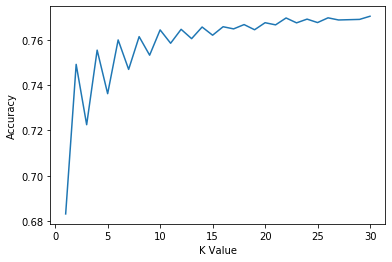

In [40]:
plt.plot(k_range, k_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy')

#Tune with k = 17 

In [41]:
np.random.seed(504)
modelKNN17 = KNeighborsClassifier(n_neighbors = 17)
modelKNN17.fit (Features_train,DepVar_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [42]:
KNN17Acc = cross_val_score(modelKNN17, Features_train, DepVar_train, cv = 10, scoring ='accuracy').mean() 
KNN17Acc

0.7648878242310152

#R-Squared

In [43]:
modelKNN17.score(Features_train,DepVar_train)

0.7803174603174603

#Support Vector Machine

In [44]:
np.random.seed(987)
modelSVM = svm.SVC(gamma = 'scale')

In [45]:
modelSVM.fit (Features_train,DepVar_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
SVMAcc = cross_val_score(modelSVM, Features_train, DepVar_train, cv = 10, scoring ='accuracy').mean() 
SVMAcc

0.7706032400245018

Tune SVM

In [47]:
np.random.seed(777)
modelSVMC = svm.SVC(gamma = 'scale', degree = 4)

In [48]:
SVMCAcc = cross_val_score(modelSVMC, Features_train, DepVar_train, cv = 10, scoring ='accuracy').mean() 
SVMCAcc

0.7706032400245018

#Making Predictions with Random Forest Model

In [49]:
DepVar_pred = modelRF40.predict(Features_test)

#Review Prediction

In [50]:
np.sum(DepVar_test)

1183

In [51]:
np.sum(DepVar_pred)

629

#Accuracy

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print('Accuracy Score: ', accuracy_score(DepVar_test, DepVar_pred))

Accuracy Score:  0.8072380952380952


#Confusion Matrix

In [55]:
confusion_matrix(DepVar_test, DepVar_pred)

array([[3838,  229],
       [ 783,  400]], dtype=int64)

#Classification Report

In [56]:
from sklearn.metrics import classification_report

In [57]:
print (classification_report(DepVar_test, DepVar_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4067
           1       0.64      0.34      0.44      1183

    accuracy                           0.81      5250
   macro avg       0.73      0.64      0.66      5250
weighted avg       0.79      0.81      0.78      5250



Plot Results